<a href="https://colab.research.google.com/github/Migaalee/machine_learning/blob/main/Assigment2_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Project description
## Objective
The goal of this assignment is to examine a set of bacterial cell images using machine learning techniques, including feature extraction, features selection and clustering, in order to help the biologists organize similar images. 
You will load all images, extract features, examine them and select a subset for clustering with the goal of reaching some conclusion about the best way of grouping these images.

## Dataset 
Images: bacteria; size: 50x50 pixels, with a black background and the segmented region centered in the image.

# Import all packages that will be used

In [2]:
#import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates,radviz, scatter_matrix
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
#from sklearn.preprocessing import StandardScaler -penso que nao devemos fazer standardizacao da data pq muda a sua forma

from sklearn.feature_selection import f_classif #for the anova
from sklearn.feature_selection import SelectKBest

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering

from sklearn.neighbors import KNeighborsClassifier #NAO USEI AINDA
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import pairwise_distances, adjusted_rand_score, silhouette_score

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



#from metrics import conf,accuracy,precision,recall,F1

#Add documents below
#from tp2_aux import report_clusters,images_as_matrix

#Only for google collabs
from google.colab import files #this is to load files from your local disk


# Upload data

Auxiliary document upload

In [3]:
TP2_aux = files.upload() 

Saving tp2_aux.py to tp2_aux.py


Data set

In [4]:
data = files.upload()

Saving images.zip to images.zip


In [5]:
import zipfile
import io
images = zipfile.ZipFile(io.BytesIO(data['images.zip']), "r")
images.extractall()

Import labels

In [6]:
y = files.upload()

Saving labels.txt to labels.txt


# Data preparation

Use the images_as_matrix function to return a 2D numpy array with one image per row (563 rows) and one pixel per column (50x50=2500 columns) from the images in the images folder.

In [7]:
from tp2_aux import images_as_matrix
X = images_as_matrix(N=563)

#Features Extraction

With each method, extract six features from the data set, for a total of 18 features.

###Principal Component Analysis (PCA)
This is a method of dimensionality reduction that computes new features maximizing the preserved variance of the original data set. It transforms the data into an orthogonal set of coordinates so that the values along each coordinate are not correlated. 

In this case, we should not standardize or normalize the data because doing so will distort its shape.


In [8]:
pca = PCA(n_components = 6) #number of features we want to extract that correspond to the principal components
X_pca = pca.fit_transform(X) #create a new matrix X, X_pca, with the new six features 
#intrepretation: prints the first 6 PC for each image

In [9]:
#Dataframe with the values of the first 6 PCA for all examples 
df_pca = pd.DataFrame(X_pca, columns = ['pca1','pca2','pca3','pca4','pca5','pca6'])
print(df_pca) 

            pca1        pca2         pca3        pca4        pca5         pca6
0   -1566.769060  256.972338   134.894382    0.425924  -78.218660    42.330691
1   -1096.790534 -259.430897   281.108128  140.741354  486.232004   337.668928
2   -1899.446655  -88.053975   188.662012   18.244945   11.080200  -351.740264
3   -1102.846546 -258.014857  -215.959216 -175.719918 -118.139772   -17.901916
4   -1713.854832 -441.738627   -58.189251  111.578875   86.092638   105.255615
..           ...         ...          ...         ...         ...          ...
558   766.613222 -693.642375  1191.752019   43.697074  195.631434  -181.278087
559 -1446.305757  440.791991   555.953435  349.498363 -388.070295  1224.688010
560 -1607.762033 -339.039528   471.903437  266.074061   42.667014   243.062456
561   200.021657 -567.829978   950.199763  125.973767 -700.379260  -788.104043
562  -320.936427  914.236161   623.763299  320.712131  536.388558  -289.600746

[563 rows x 6 columns]


###t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [10]:
tsne = TSNE(n_components = 6, method = 'exact') #method = ’barnes_hut’ is the default. method = 'exact' runs a slower, but exact, algorithm in O(N^2) time. The exact algorithm should be used when nearest-neighbor errors need to be better than 3%. However, the exact method cannot scale to millions of examples.
X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [11]:
#Dataframe
df_tsne = pd.DataFrame(X_tsne,columns = ['tsne1','tsne2','tsne3','tsne4','tsne5','tsne6'])
print(df_tsne)


         tsne1      tsne2      tsne3      tsne4      tsne5      tsne6
0     0.855597  29.005331  -1.225080   4.756768   9.580190   4.564514
1    16.549860  11.478682  -4.458717  10.442417   5.762384   7.799073
2     5.711592  12.994507   8.789744  -0.405652   8.368215  20.210072
3    -0.171409   1.455927  -0.824224  -4.399682  11.070103  12.856297
4     1.727862  19.073788  -5.843544  -2.157002   5.568625   5.804968
..         ...        ...        ...        ...        ...        ...
558  -0.200099  -6.224774  19.753368   0.485150  -2.094096 -13.477551
559  18.388405  13.580124   0.957040 -16.598333  -0.174443   3.613509
560   6.077962  21.653002  -1.265884   1.309318  -2.733871  16.838158
561   6.631903  -4.232077   4.607691  -5.140133 -20.586290  -2.109891
562  17.862597  12.783936   0.318376  -4.278673  -2.883788  -5.028443

[563 rows x 6 columns]


###Isometric mapping with Isomap

In [12]:
isomap = Isomap(n_components = 6, n_neighbors=5) #5 é o numero de neighbours por default
X_isomap = isomap.fit_transform(X)

In [13]:
#Dataframe
df_isomap = pd.DataFrame(X_isomap,columns = ['im1','im2','im3','im4','im5','im6'])
print(df_isomap)

             im1          im2  ...         im5          im6
0   -3542.154360   985.098659  ...   15.216278  1308.514337
1   -3150.522163  -585.940269  ...  655.008573   813.251967
2   -4943.865828    85.856124  ... -407.711430  1107.826303
3   -2305.977768  -639.373716  ... -606.680737    76.015657
4   -3927.758208  -839.460439  ...  613.825335   994.550631
..           ...          ...  ...         ...          ...
558  2725.343066   720.793744  ...  961.556475  -839.706573
559 -4475.871424  1152.987403  ...  371.217944   588.210993
560 -4567.669782    36.818054  ...  423.216752  1478.428098
561  3365.305026  -210.677432  ... -544.573532  -313.341049
562  -896.830004  3109.392351  ...  782.954261   634.254161

[563 rows x 6 columns]


##After extracting features, select the best for clustering.

In [14]:
#Transform the labels document into a pandas dataframe 

labels = np.loadtxt('labels.txt', delimiter=',')
y = labels[:,1].reshape(-1,1)
y = pd.DataFrame(y, columns = ['y'])

print(y)
#y.iloc[105] #test that will concatenate well later

       y
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
..   ...
558  0.0
559  0.0
560  0.0
561  0.0
562  0.0

[563 rows x 1 columns]


In [15]:
#Create a dataframe with the 18 features and the y values
df_total = pd.concat((df_pca, df_tsne, df_isomap, y), axis=1)
print(df_total) 

            pca1        pca2         pca3  ...         im5          im6    y
0   -1566.769060  256.972338   134.894382  ...   15.216278  1308.514337  0.0
1   -1096.790534 -259.430897   281.108128  ...  655.008573   813.251967  0.0
2   -1899.446655  -88.053975   188.662012  ... -407.711430  1107.826303  0.0
3   -1102.846546 -258.014857  -215.959216  ... -606.680737    76.015657  0.0
4   -1713.854832 -441.738627   -58.189251  ...  613.825335   994.550631  0.0
..           ...         ...          ...  ...         ...          ...  ...
558   766.613222 -693.642375  1191.752019  ...  961.556475  -839.706573  0.0
559 -1446.305757  440.791991   555.953435  ...  371.217944   588.210993  0.0
560 -1607.762033 -339.039528   471.903437  ...  423.216752  1478.428098  0.0
561   200.021657 -567.829978   950.199763  ... -544.573532  -313.341049  0.0
562  -320.936427  914.236161   623.763299  ...  782.954261   634.254161  0.0

[563 rows x 19 columns]


In [16]:
#Select only the rows when y != 0
df_evaluated = df_total[df_total['y'] > 0]
df_evaluated.pop("y")
#print(df_evaluated)
#with pd.option_context('display.max_columns', None):  # more options can be specified also
#    print(df_evaluated)


#Create y dataframe only when y != 0
y_evaluated = y[y['y'] > 0]
#print(y_evaluated)
#print(len(y_evaluated))

### Choose features to maintain

In [17]:
#Evaluate the most usefull features with ANOVA
f, prob = f_classif(df_evaluated,y_evaluated) 
print(f) # check highest value here
print(prob) #check smallest value here

#maybe 2, 14, 13, 3, 1

[ 7.84258393 46.63388145 19.18778372  0.33913883  0.28164115  1.26282863
  3.61635991  1.35262787  0.65699686 23.13001852  0.95577654  7.26750132
 21.99504424 42.17749338  2.72446618  2.36041578  0.78303462  0.75318691]
[7.88001007e-04 4.76804262e-14 1.67139405e-07 7.13428706e-01
 7.55308450e-01 2.88570979e-01 3.14805247e-02 2.64556601e-01
 5.21250615e-01 1.29646809e-08 3.88970108e-01 1.27571563e-03
 2.66092234e-08 3.83292069e-13 7.18255400e-02 1.01090125e-01
 4.60575969e-01 4.74256833e-01]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#Evaluate the most usefull features with Select K Best - Lecture 15
selector = SelectKBest(f_classif, k=5)
X_final = selector.fit_transform(df_evaluated, y_evaluated)

#print(X_final)

#Dataframe
#df_X_final = pd.DataFrame(X_final,columns = ['ft1','ft2','ft3', 'ft4', 'ft5'])

#print(df_X_final)

cols = selector.get_support(indices=True)
features_df_new = df_evaluated.iloc[:,cols]

features_df_new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,pca2,pca3,tsne4,im1,im2
25,-876.523110,-459.409525,-5.748085,-1909.045836,-1467.993748
87,282.057740,-1283.710950,2.131435,-769.569393,-1750.049802
98,-473.283368,-515.608764,12.393863,-1523.531888,-1807.478902
105,142.332322,-835.238114,-3.682236,-1505.950785,-832.815079
106,-995.149489,-595.658689,5.069752,-25.219991,-2453.627865
...,...,...,...,...,...
536,-277.597470,907.638513,7.767224,3528.325142,1789.316091
538,-624.778409,1109.604126,7.440044,3513.514033,1128.573788
544,11.491707,849.700334,6.805619,3925.080065,1743.520992
554,713.092485,1394.046178,6.476586,3814.904133,4498.864941


In [19]:
for i in range(len(selector.scores_)):
	print('Feature %d: %f' % (i, selector.scores_[i]))

Feature 0: 7.842584
Feature 1: 46.633881
Feature 2: 19.187784
Feature 3: 0.339139
Feature 4: 0.281641
Feature 5: 1.262829
Feature 6: 3.616360
Feature 7: 1.352628
Feature 8: 0.656997
Feature 9: 23.130019
Feature 10: 0.955777
Feature 11: 7.267501
Feature 12: 21.995044
Feature 13: 42.177493
Feature 14: 2.724466
Feature 15: 2.360416
Feature 16: 0.783035
Feature 17: 0.753187


### Plot the scores from SelectKbest

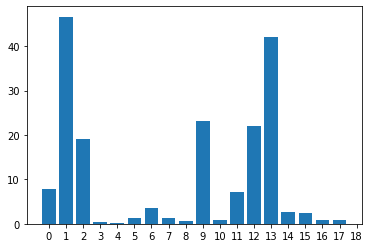

In [20]:

from matplotlib import pyplot
plt.xticks(range(0, 19))
pyplot.bar([i for i in range(len(selector.scores_))], selector.scores_)
pyplot.show()

Scatter matrix


In [21]:
#scatter_matrix(df_evaluated, alpha=0.5, figsize=(10,7), diagonal='kde')

### Check which features correlate with each other

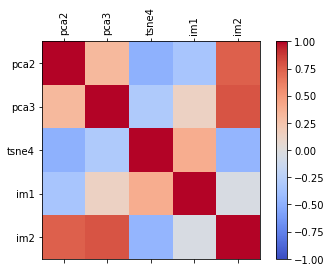

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = features_df_new
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

#Here we can see that pca1 and im1 is very correlated, so we should choose one of them. Pca1 had a lower score in Kbest and also lower F value, so im1 is a better feature.

### Mutual information criteria

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [23]:
MI = mutual_info_classif(features_df_new, y_evaluated)
print(MI) #Estimated mutual information between each feature and the target.
#we can see that some of the features have a modestly low score, such as pca1, suggesting that perhaps they can be removed. 
# We can choose 4 features: PCA2 (col1), PCA3(col2), IM1 (col12), IM2 (col13). Or 3 features: PCA2 (col1), IM1 (col12), IM2 (col13).

[0.41003468 0.17753745 0.21990489 0.34146965 0.33181999]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Clustering algorithms
For this assignment, you will parametrize and compare at least two clustering algorithms: DBSCAN and K-Means. 

In [24]:
#HERE WE USE ALL DATA, INCLUDING THE UNLABELED!!

features_3 = df_total.iloc[:,[1,12,13,18]]
Y_features_3 = features_3.iloc[:,-1]
X_features_3 = features_3.iloc[:, features_3.columns != 'y']


features_4 = df_total.iloc[:,[1,2,12,13,18]]
Y_features_4 = features_4.iloc[:,-1]
X_features_4 = features_4.iloc[:, features_4.columns != 'y']


##DBSCAN 
(you should use a value of 5 neighbouring points as this is the default value in the Scikit-Learn implementation of DBSCAN)

In [25]:
clustering = DBSCAN(eps=800).fit(X_features_4)
clustering.labels_

array([ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0,  2,  2,  0,  0,  2, -1,
        0,  0,  1,  0,  0,  2,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

Find the best epsilon

[[  0.         293.24924934 432.66531539 544.08465852 548.6982056
  666.8048993 ]
 [  0.         492.18604676 498.80344785 510.08489824 513.35903185
  518.46424983]
 [  0.         302.24561327 399.31719779 494.3490046  535.86160051
  593.35572985]
 ...
 [  0.         416.51954642 451.62465165 513.69772445 521.98009269
  535.86160051]
 [  0.         486.68667032 493.41324161 529.41714262 560.44235069
  732.56090592]
 [  0.         430.23180121 515.1527722  768.16479615 800.96454548
  998.7931101 ]]


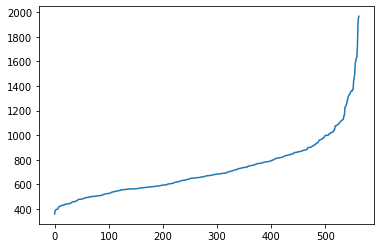

In [25]:
#Calculate the distances of each point to its 5 (default) nearest neighbours
nn5 = NearestNeighbors(n_neighbors = 6) #we need to exclude the point itself!!!!
nn5_X = nn5.fit(X_features_4)
distances, indices = nn5_X.kneighbors(X_features_4)
print(distances) #prints distances o a point to each of its 5 nearest neighbours

#Plot this distances
distances = np.sort(distances, axis=0) #sort in ascending order
distances = distances[:,-1] #we want the distance to the fifth neighbor#
plt.plot(distances)

##K-Means

Predict number of clusters using Silhoutte method. The silhouette score of 1 means that the clusters are very dense and nicely separated. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect.

In [26]:
range_n_clusters = [ 2, 3, 4, 5, 6,7, 8, 9, 10]
silhouette_avg = []

for n_clusters in range_n_clusters:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(X_features_4)
    silhouette_avg = silhouette_score(X_features_4, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.40966556863834674
For n_clusters = 3 The average silhouette_score is : 0.3682789285012158
For n_clusters = 4 The average silhouette_score is : 0.370073513307405
For n_clusters = 5 The average silhouette_score is : 0.3610609764012879
For n_clusters = 6 The average silhouette_score is : 0.3685795198098725
For n_clusters = 7 The average silhouette_score is : 0.35669811663065
For n_clusters = 8 The average silhouette_score is : 0.32763562049889094
For n_clusters = 9 The average silhouette_score is : 0.31845700923149084
For n_clusters = 10 The average silhouette_score is : 0.30658656421134345


Predict number of clusters using Elbow method. 
In this plot, the number of clusters k is plotted against the distortion score, which is a total of within-cluster sum of squares for a given number of k. The optimal number of k is determined by a point where there is a bend in the curve (elbow). In this case, it is not very clear where we are seeing the bend, the best k = 4. However we could try a  range of k=4 to K=8.

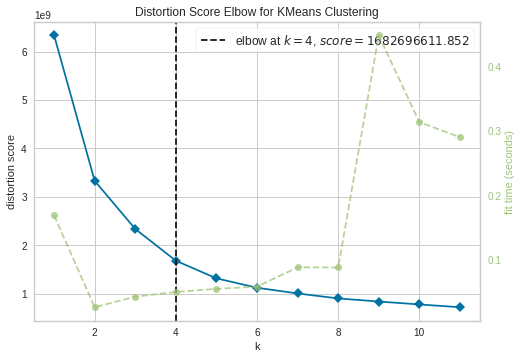

In [27]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_features_4)
visualizer.show()


Try scaling data and not-scaling data to see which would give us the best separation.

In [28]:
#Normalize the data by z-score
means = X_features_4.mean(axis=0) # axis=0 means working along the row
std=X_features_4.std(axis=0)
x_norm_z = (X_features_4 - means)/(std)
#print(x_norm_z)

alldata_scaled = pd.concat((x_norm_z, Y_features_4), axis=1)
alldata_not_scaled=pd.concat((X_features_4, Y_features_4), axis=1)
#print(alldata_scaled)
#print(alldata_not_scaled)

X = alldata_scaled[['pca2','pca3','im1','im2']].values
y_values = alldata_scaled[['y']].values.flatten()



Visualise k-means clustering using a range of different K and compare model performance using suggested methods

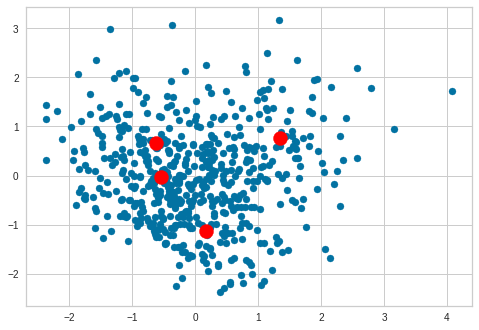

In [29]:
kmeans = KMeans(n_clusters = 4,                 # Set amount of clusters
                init = 'k-means++',             # Initialization method for kmeans
                max_iter = 300,                 # Maximum number of iterations
                n_init = 10,                    # Choose how often algorithm will run with different centroid
                random_state = 0)               # Choose random state for reproducibility

pred_y = kmeans.fit_predict(X)



# Plot the data
plt.scatter(X[:,0], 
            X[:,1])

# Plot the clusters 

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=200,                             # Set centroid size
            c='red')                           # Set centroid color
plt.show()

In [30]:
np.shape(y_values)

true_y =((y_values[y_values!=0]).astype(int) -1).flatten()
pred = (pred_y[y_values!=0]).flatten()
print(np.shape(pred))
print(pred)


(81,)
[2 0 2 0 2 2 2 2 2 0 2 2 2 2 0 1 0 0 0 1 1 1 1 1 1 0 2 3 0 1 3 3 3 3 0 1 1
 3 3 3 0 1 1 1 3 1 1 1 1 3 3 0 0 1 3 1 3 3 3 3 3 3 3 1 3 3 3 1 1 3 3 3 3 3
 1 1 3 3 3 1 3]


In [31]:

print(np.shape(true_y))
print(true_y)

(81,)
[0 0 0 1 0 0 0 2 0 0 0 1 2 0 0 2 0 0 0 1 2 2 2 1 1 0 1 1 0 2 1 0 0 0 0 2 2
 0 0 0 0 2 2 1 0 1 2 2 1 0 0 0 0 2 0 2 1 0 0 1 1 0 1 1 0 0 1 2 2 1 0 0 0 1
 1 2 0 0 1 1 1]


> We need to make a multiclass confusion matrix function and calculate precision, recall, F1 and RI based on it.

> In unsupervised learning we cannot match examples with classes
but we can consider all pairs of points: N(N-1)/2



In [222]:
"""
• True Positive: a pair from the same group placed in the same cluster
• True Negative: a pair from different groups placed in different clusters
• False Positive: a pair from different groups placed in the same cluster
• False Negative: a pair from the same group placed in different clusters
"""


'\n• True Positive: a pair from the same group placed in the same cluster\n• True Negative: a pair from different groups placed in different clusters\n• False Positive: a pair from different groups placed in the same cluster\n• False Negative: a pair from the same group placed in different clusters\n'

### Plot K-means clustering and add different performance metrics

Here we need to report: Silhouette score, the Rand index, Precision, Recall, the F1 measure and the adjusted Rand index.
 Note that the adjusted Rand index can be computed using the adjusted_rand_score function and the silhouette score using silhouette_score, both from sklearn.metrics.

For n = 2 | The avg silhouette_score: 0.314 | Adjusted rand score: 0.309
For n = 3 | The avg silhouette_score: 0.309 | Adjusted rand score: 0.317
For n = 4 | The avg silhouette_score: 0.3 | Adjusted rand score: 0.252
For n = 5 | The avg silhouette_score: 0.287 | Adjusted rand score: 0.243
For n = 6 | The avg silhouette_score: 0.285 | Adjusted rand score: 0.232
For n = 7 | The avg silhouette_score: 0.267 | Adjusted rand score: 0.193
For n = 8 | The avg silhouette_score: 0.262 | Adjusted rand score: 0.174


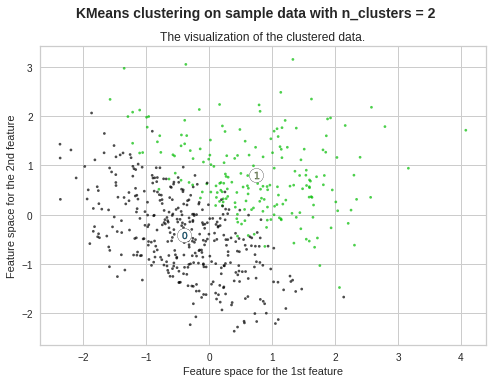

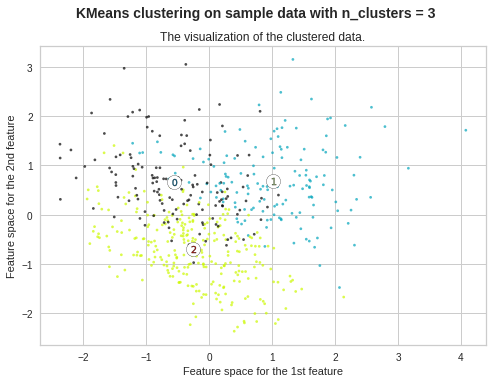

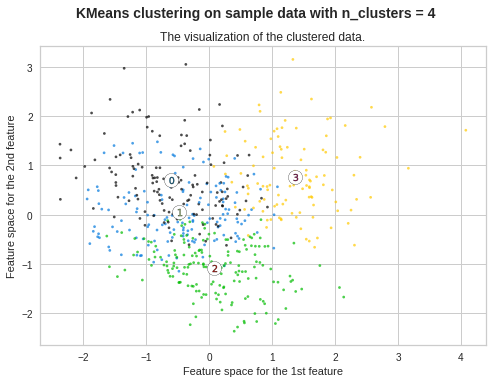

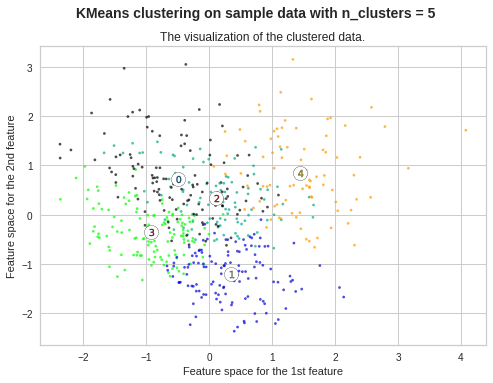

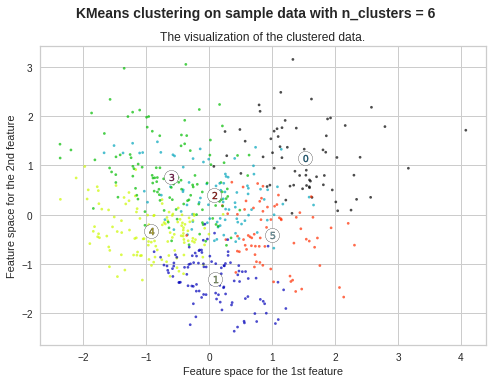

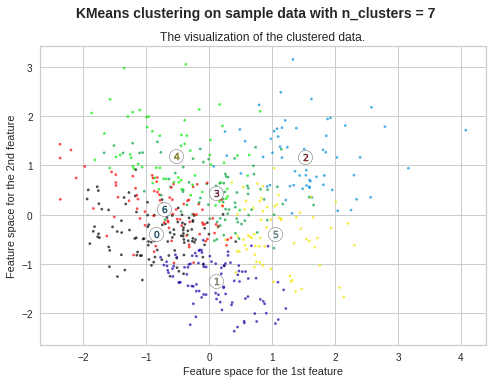

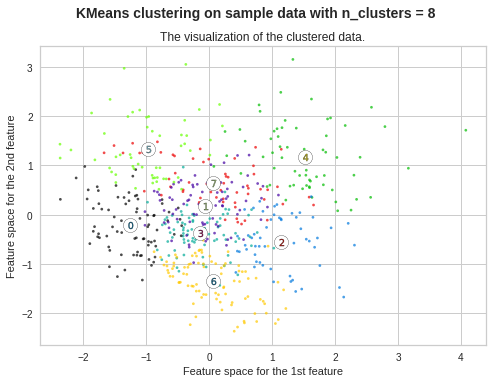

In [64]:
from tp2_aux import report_clusters

range_n_clusters = np.arange(2,9)

ids = (alldata_scaled.index.values +1)


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig2, ax2 = plt.subplots()
    fig.set_size_inches(18, 7)

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)



    true_y =((y_values[y_values!=0]).astype(int) -1)
    pred = (cluster_labels[y_values!=0])


    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    adj_rand_score = adjusted_rand_score(true_y, pred)

    print(
        "For n =",
        n_clusters,"|",
        "The avg silhouette_score:", 
        np.round(silhouette_avg,3), "|",
        "Adjusted rand score:",
        np.round(adj_rand_score,3)
    )

    """Report_clusters function generates html with cluster report
    ids is a 1D array with the id numbers of the images in the images/ folder
    labels is a 1D array with the corresponding cluster labels
    """

    #report_clusters(ids, cluster_labels, report_file) # how to use it?
    

    # Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()



##Examine the performance
In addition, examine the performance of each algorithm (K-Means and DBSCAN) by varying the main parameter of each one (neighbourhood distance ε and number of clusters k; you can leave the other parameters with their default values)

##Select some parameter values
Finally, select some parameter values for closer examination by visually inspecting the clusters generated. For this you can use the report_clusters(ids, labels, report_file) function in the tp2_aux.py module.

In [63]:
from tp2_aux import report_clusters
report = report_clusters(ids, cluster_labels,  report_file)
print(report)

NameError: ignored

Considering all the information gathered at this stage, recommend a procedure for the biologists that will help them process the segmented images, both for cell classification and to help discard segmentation errors.

##Optional exercise (2/20) - Bissecting K-Means hierarchical clustering (lecture 19)

Example of hierarchical divisive clustering. The possibility of stopping at any desired level makes this process less time-consuming, although it is a divisive cluster (usually O(2^n)). 